In [82]:
from scipy import integrate
import numpy as np
import sympy as sym
import math as m
from scipy.interpolate import interp1d
from scipy import integrate
import matplotlib.pyplot as plt
#@matplotlib inline

r=np.load('r_for_W.npy')
W11_r=np.load('W_r_mos2.npy')

In [83]:
from scipy.integrate import quad

#квадрат волновой функции
def wavefunc(x,a):
    return 4*np.exp(-2*x/a)/(2*np.pi*a**2)

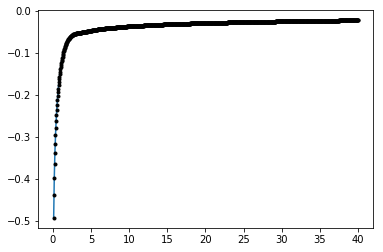

In [84]:
W11r = interp1d(r,W11_r,kind='linear')
plt.plot(r,W11r(r))
plt.plot(r,W11_r,'k.')

def integrand11(rr,a):
    return 2*np.pi*rr*wavefunc(rr,a)*W11r(rr)*27.21
    
def V11(a):    
    return integrate.quad(integrand11, r[0], r[-1], args=(2,), limit=200)[0]

In [91]:
V11(1000)

-3.0254053727535437

In [ ]:
V11(1)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

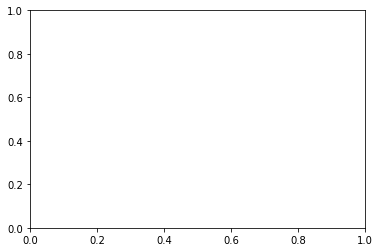

In [86]:
a=np.linspace(1,20,100)
plt.plot(a,V11(a))

In [70]:
m0=9.1*10**(-28)
h=6.58210**(-16)
m1e=0.57*m0
m1h=0.66*m0
mu11=1/(1/m1e+1/m1h)

def K11(a):
    return h**2/(2*mu11*a**2)

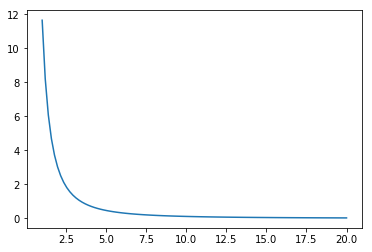

In [74]:
a=np.linspace(1,20,100)
plt.plot(a,K11(a))

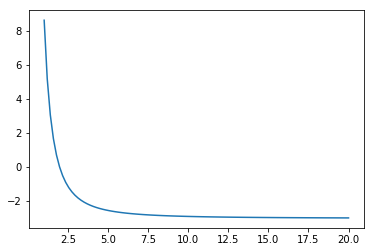

In [72]:
a=np.linspace(1,20,100)

def energy(a):
    H11=K11(a)+V11(a)
    return H11

plt.plot(a,energy(a))